In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
import numpy as np
import trees
from trees.ddt import *
import mpld3
import seaborn as sns
sns.set_style('white')
from tqdm import tqdm
from sklearn.decomposition import PCA

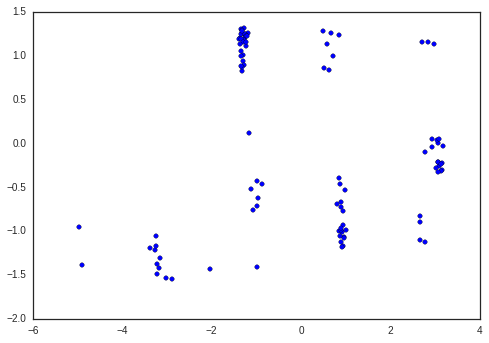

In [3]:
X, y = trees.data.load('zoo')
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X += np.random.normal(scale=.05, size=X.shape)
X = X[:5]
y = y
N, D = X.shape
scatter(*X.T)
interactor = trees.interact.Interactor(X, y, trees.interact.Database('../zoo.db'))

INFO:root:Compiling <Inverse> object...
INFO:root:Done compiling <Inverse> object.
INFO:root:Compiling <GaussianLikelihoodModel> object...
INFO:root:Done compiling <GaussianLikelihoodModel> object.


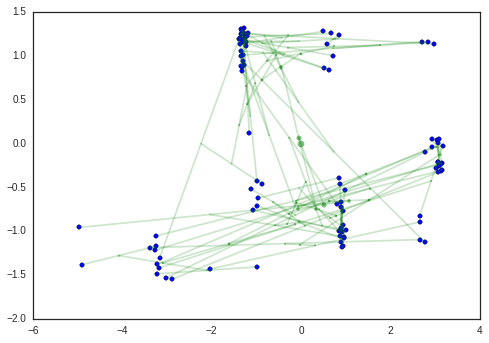

In [ ]:
df = Inverse(c=1)

constraints = interactor.interactions

lm = GaussianLikelihoodModel(sigma=np.cov(X.T) / 2.0, sigma0=np.eye(D) *2, mu0=X.mean(axis=0)).compile()
sampler = MetropolisHastingsSampler(InteractiveDirichletDiffusionTree(df, lm, constraints=constraints), X)
sampler.initialize_assignments()

def iterate(n_iters):
    lls = []
    for i in tqdm(xrange(n_iters)):
        old_ddt = sampler.ddt
        sampler.sample()
        lls.append(sampler.ddt.marg_log_likelihood())
    return lls

def plot_tree(ddt):
    scatter(*X.T)
    def plot_node(node, size=40):
        if isinstance(node, Leaf):
            return
        scatter(*node.state, color='g', alpha=0.5,s=size)
        for child in node.children:
            plot(*zip(node.state, child.state), color='g', alpha=0.2)
            plot_node(child, size=size/2)
    plot_node(ddt.root)
plt.figure()
plot_tree(sampler.ddt)
for constraint in constraints:
    assert sampler.ddt.verify_constraint(constraint), constraint

In [ ]:
plot(iterate(10000))
figure()
plot_tree(sampler.ddt)

|#---------| 1150/10000  11% [elapsed: 01:36 left: 12:21, 11.93 iters/sec]

In [6]:
mpld3.display(sampler.ddt.plot_mpld3(y))

In [23]:
sampler.ddt.add_constraint((4, 7, 5))

In [30]:
sampler.ddt.constraints

[(9, 5, 7), (4, 7, 1)]

In [6]:
sampler.ddt.verify_constraints(interactor.interactions)

True

In [13]:
(y.index('dalmatian'), y.index('german+shepherd'), y.index('grizzly+bear'))

(4, 7, 1)

In [6]:
[y[a] for a in (20, 71, 26)]

['dove', 'rhea', 'frog']

In [11]:
for constraint in constraints:
    print constraint
    sampler.add_constraint(constraint)

(12, 86, 48)
(39, 42, 23)
(23, 33, 0)
(44, 68, 12)
(18, 86, 83)
(0, 66, 13)
(19, 68, 89)
(28, 49, 59)
(55, 66, 95)
(60, 73, 66)
(32, 75, 58)
(37, 95, 85)
(1, 54, 11)
(31, 64, 77)
(61, 73, 63)
(47, 64, 99)
(94, 96, 26)
(0, 10, 60)
(61, 82, 1)
(32, 64, 51)


AssertionError: 